# Predicting Car prices (By KNN Model)

The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

![](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)

We will predict a car's market price using its `attributes` by appling **K-Nearest Neighbors Model**.

## Introduction to the Data Set

In [1]:
#import pandas module.

import pandas as pd

cars = pd.read_csv("imports-85.data")

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
3              204 non-null int64
?              204 non-null object
alfa-romero    204 non-null object
gas            204 non-null object
std            204 non-null object
two            204 non-null object
convertible    204 non-null object
rwd            204 non-null object
front          204 non-null object
88.60          204 non-null float64
168.80         204 non-null float64
64.10          204 non-null float64
48.80          204 non-null float64
2548           204 non-null int64
dohc           204 non-null object
four           204 non-null object
130            204 non-null int64
mpfi           204 non-null object
3.47           204 non-null object
2.68           204 non-null object
9.00           204 non-null float64
111            204 non-null object
5000           204 non-null object
21             204 non-null int64
27             204 non-null int64
13495          204 n

In [3]:
cars.head(3)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


Since, columns in the dataset is different from the Data Dictionary. So, We will rename the columns.

In [4]:
cars.columns =  ['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [5]:
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


There are total **10 numeric** columns. The `price` column is the **target column**. Rest 9 columns can be used as **feature column**. 

## Data Cleaning

In [6]:
import numpy as np

cars  = cars.replace('?', np.nan)
cars.head(3)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950


In [7]:
cars['normalized_losses'].value_counts(dropna = False)

NaN    40
161    11
91      8
150     7
104     6
128     6
134     6
103     5
85      5
65      5
102     5
74      5
94      5
168     5
95      5
148     4
106     4
122     4
118     4
93      4
125     3
154     3
137     3
83      3
115     3
101     3
108     2
158     2
81      2
197     2
188     2
145     2
153     2
110     2
192     2
87      2
89      2
194     2
119     2
113     2
164     2
129     2
77      1
256     1
90      1
231     1
78      1
107     1
121     1
186     1
98      1
142     1
Name: normalized_losses, dtype: int64

In [8]:
cars['price'] = cars['price'].astype(float)
reqd_df = cars.select_dtypes(include = ('int64','float64')).copy()

In [9]:
reqd_df.head(3)

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,9.0,21,27,16500.0
1,1,94.5,171.2,65.5,52.4,2823,152,9.0,19,26,16500.0
2,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,13950.0


In [10]:
cars['price'].dtypes

dtype('float64')

In [11]:
reqd_df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,200.000000
mean,0.823529,98.806373,174.075000,65.916667,53.749020,2555.602941,126.892157,10.148137,25.240196,30.769608,13205.690000
std,1.239035,5.994144,12.362123,2.146716,2.424901,521.960820,41.744569,3.981000,6.551513,6.898337,7966.982558
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.075000,52.000000,2145.000000,97.000000,8.575000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,119.500000,9.000000,24.000000,30.000000,10270.000000
75%,2.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.000000,9.400000,30.000000,34.500000,16500.750000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


Since, no other numeric columns has missing values except the `normalized_losses` column. So, we will drop this column entirely. 

In [12]:
cars.drop(['normalized_losses'], axis = 1 , inplace = True)

In [13]:
a = reqd_df.columns.tolist()
a.remove('price')
reqd_df[a] = (reqd_df[a] - reqd_df[a].mean())/(reqd_df[a].std())
reqd_df.head(2)    

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
0,1.756586,-1.702724,-0.426707,-0.846254,-2.040916,-0.014566,0.074449,-0.288404,-0.647209,-0.546452,16500.0
1,0.142426,-0.718430,-0.232565,-0.194095,-0.556319,0.512293,0.601464,-0.288404,-0.952482,-0.691414,16500.0


## Training a Univariate KNN Model

In [14]:
# definig knn_train_test() column


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error



def knn_train_test(training_column, target_column,df):
    
    b = df.shape[0]
    ind = int(0.75*b)
    train_data = df.iloc[0:ind].copy()
    test_data =  df.iloc[ind:].copy()
    
    
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = 5)
    # Fit the classifier to the data
    knn.fit(train_data[[training_column]],train_data[target_column])
    # Predict the tartget column
    predictions = knn.predict(test_data[[training_column]])
    
    
    rmse = mean_squared_error(test_data[target_column],predictions)**(1/2)
                                        
    return rmse
                                        

In [15]:
# Making predictions by different numeric column as feature
a = reqd_df.columns.tolist()
a.remove('price')
rmse_list_uni = []

reqd_df.dropna(axis = 0 ,inplace = True)
for each in a:
    uni_rmse = knn_train_test(each,'price',reqd_df)
    rmse_list_uni.append(uni_rmse)

In [16]:
rmse_list_uni_series = pd.Series(rmse_list_uni, index = a)
rmse_list_uni_series

symboling            5568.505246
wheel_base           3513.438757
length               4692.057504
width                4339.991304
height               5799.271747
curb_weight          3669.390274
engine_size          3636.754751
compression_ratio    6915.327927
city_mpg             4936.943307
highway_mpg          4288.443331
dtype: float64

In [17]:
a = reqd_df.columns.tolist()
a.remove('price')

In [18]:
a

['symboling',
 'wheel_base',
 'length',
 'width',
 'height',
 'curb_weight',
 'engine_size',
 'compression_ratio',
 'city_mpg',
 'highway_mpg']

In [19]:
reqd_df.isnull().sum()

symboling            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
compression_ratio    0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

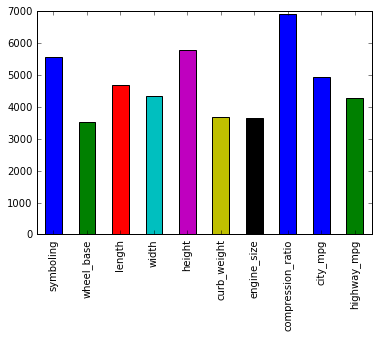

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt


rmse_list_uni_series.plot.bar()

In [27]:
# Modifying knn_train_test() function so that it can accept the k value as parameter.

def knn_train_test(training_column, target_column,df,k):
    
    b = df.shape[0]
    ind = int(0.75*b)
    train_data = df.iloc[0:ind].copy()
    test_data =  df.iloc[ind:].copy()
    
    
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit the classifier to the data
    knn.fit(train_data[[training_column]],train_data[target_column])
    # Predict the tartget column
    predictions = knn.predict(test_data[[training_column]])
    
    
    rmse = mean_squared_error(test_data[target_column],predictions)**(1/2)
                                        
    return rmse

k = [1,3,5,7,9]
features = reqd_df.columns.tolist()
features.remove('price')
rmse_col_dict = {}

for col in features:
    rmse_dict = {}
    for i in k:
        rmse = knn_train_test(col, 'price',reqd_df,i)
        rmse_dict[i] = rmse
    rmse_col_dict[col] = rmse_dict

In [28]:
rmse_col_dict

{'city_mpg': {1: 4488.672209016827,
  3: 4723.836017475628,
  5: 4936.94330735122,
  7: 4925.083755632994,
  9: 4962.476498684906},
 'compression_ratio': {1: 7485.591454253966,
  3: 6416.7784456064865,
  5: 6915.327927148503,
  7: 7043.929592209167,
  9: 7138.210041740156},
 'curb_weight': {1: 3824.6832051818355,
  3: 3489.0336828411387,
  5: 3669.390273601324,
  7: 3755.89233072515,
  9: 3577.110758698981},
 'engine_size': {1: 5001.78490940984,
  3: 4083.0504062526584,
  5: 3636.7547511483367,
  7: 3865.1401345876193,
  9: 4597.014709569678},
 'height': {1: 12082.011217508449,
  3: 5431.724952535797,
  5: 5799.271747383459,
  7: 6114.7293431516655,
  9: 6051.048474438128},
 'highway_mpg': {1: 4122.124384343588,
  3: 4008.2930905810767,
  5: 4288.443330627094,
  7: 4698.84710753606,
  9: 4817.750583000328},
 'length': {1: 8416.831245783653,
  3: 4672.871453399933,
  5: 4692.057503910199,
  7: 2876.9438993487515,
  9: 4166.846805439336},
 'symboling': {1: 5566.0382391787425,
  3: 5568.5

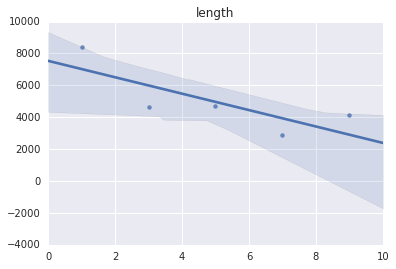

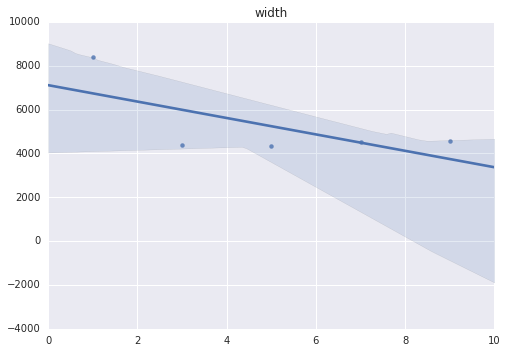

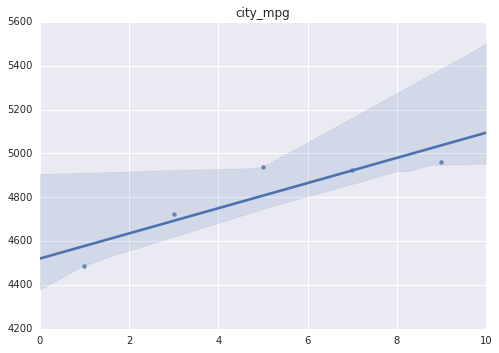

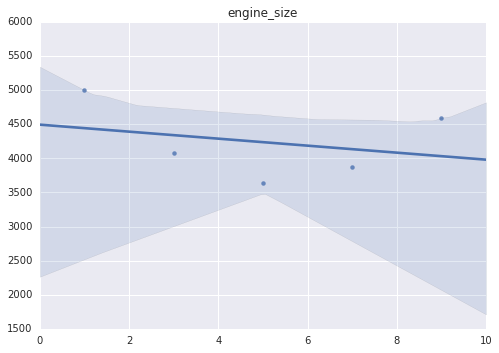

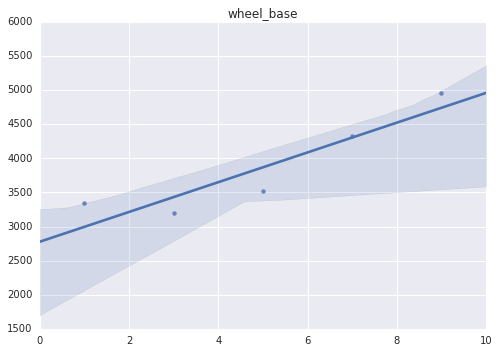

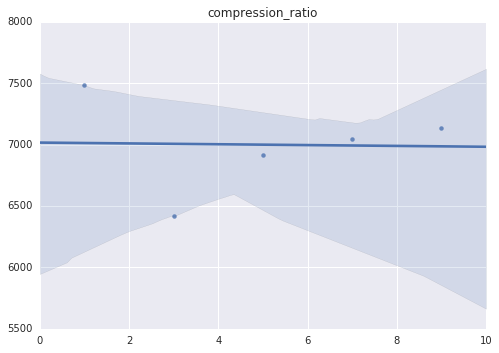

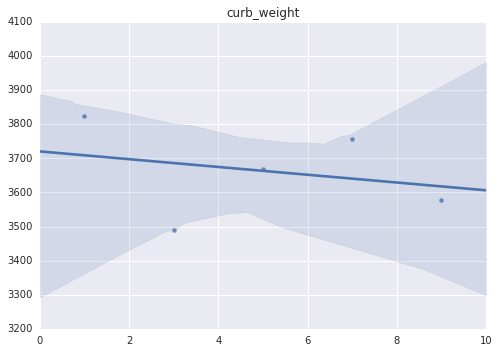

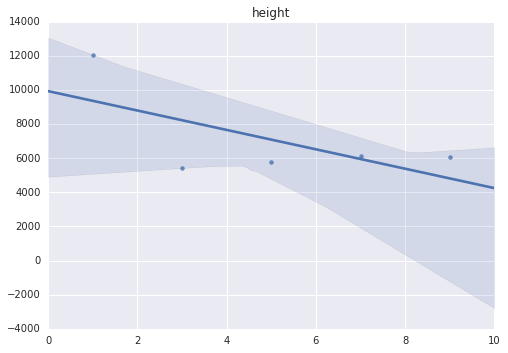

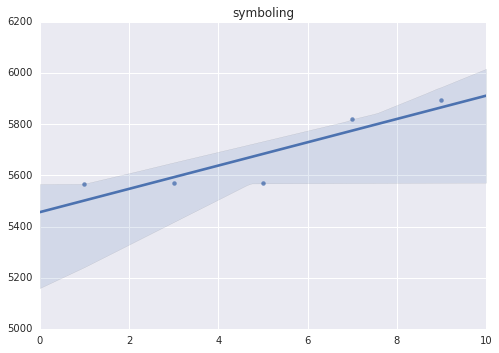

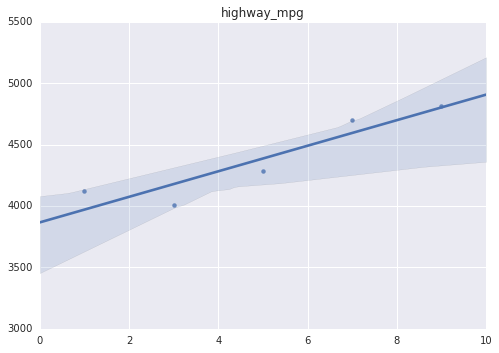

In [47]:
# plotting scatter plot for k_values vs RMSE of integer col
import seaborn as sns

plt.figure(figsize = (6,4))
for i,each,title in zip(range(1,11),rmse_col_dict.values(),rmse_col_dict.keys()):
    x_keys = each.keys()
    y_values = each.values()
    sns.regplot(x = np.fromiter(x_keys,dtype = float), y = np.fromiter(y_values,dtype = float))
    plt.title(title)
    plt.show()

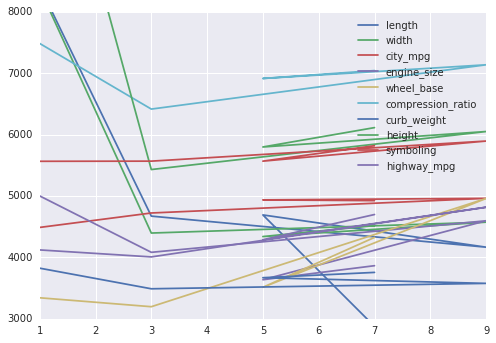

In [54]:
for i,each,title in zip(range(1,11),rmse_col_dict.values(),rmse_col_dict.keys()):
    x_keys = each.keys()
    y_values = each.values()
    plt.plot(list(x_keys),list(y_values),label = title)
plt.ylim(3000,8000)    
plt.legend()    
plt.show()

## Training a Multivariate KNN Model

In [71]:
# calculating average rmse for each feature

avg_rmse = {}
for each,title in zip(rmse_col_dict.values(),rmse_col_dict.keys()):
    mean_rmse = np.mean(np.fromiter(each.values(),dtype = float))
    avg_rmse[title] = mean_rmse
    
avg_rmse = pd.Series(avg_rmse).sort_values()
avg_rmse

curb_weight          3663.222050
wheel_base           3867.847447
engine_size          4236.748982
highway_mpg          4387.091699
city_mpg             4807.402358
length               4965.110182
width                5242.199096
symboling            5683.760502
compression_ratio    6999.967492
height               7095.757147
dtype: float64

In [75]:
# modifying the knn_train_test() function for multivariate input

def knn_train_test(training_column, target_column,df,k):
    
    b = df.shape[0]
    ind = int(0.75*b)
    train_data = df.iloc[0:ind].copy()
    test_data =  df.iloc[ind:].copy()
    
    
    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit the classifier to the data
    knn.fit(train_data[training_column],train_data[target_column])
    # Predict the tartget column
    predictions = knn.predict(test_data[training_column])
    
    
    rmse = mean_squared_error(test_data[target_column],predictions)**(1/2)
                                        
    return rmse

In [78]:
# calculating rmse for various number of features
rmse_multivariate_dict = {}

for i in range(2,6):
    rmse = knn_train_test(list(avg_rmse.index[:i]), 'price',reqd_df,5)
    rmse_multivariate_dict[i] = rmse
rmse_multivariate_dict

{2: 3359.2727516532505,
 3: 3164.079148820396,
 4: 3469.2476677227874,
 5: 3601.9577704354056}

We have modified the knn_train_test() function so that it works for multiple features. We have trained the model with the 2,3,4,5 best features respectively and we find that it works best for the 3 features. So, now we will try to optimise our model by hyperparameter tuning by varying the k values from 1 to 25 on the best three features.

## Hyperparameter Tuning

In [79]:
# calculating rmse for k varies from 1 to 25.
k_best_3 = {}

for i in range(1,26):
    rmse = knn_train_test(list(avg_rmse.index[:i]), 'price',reqd_df,i)
    k_best_3[i] = rmse

In [83]:
plt.style.available

['ggplot',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'dark_background',
 'seaborn-dark',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'seaborn-deep',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'grayscale',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-whitegrid',
 'seaborn-poster',
 'seaborn-muted',
 'seaborn-colorblind',
 'bmh',
 'classic']

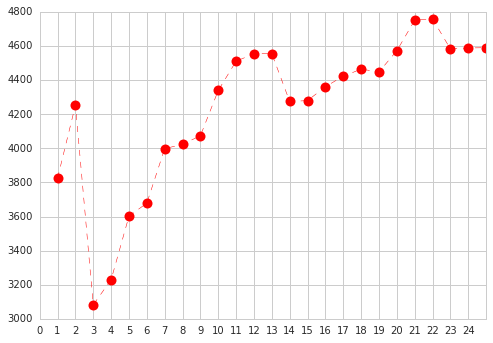

In [94]:
# visualizing rmse for k varies from 1 to 25.
plt.style.use('seaborn-whitegrid')
plt.plot(list(k_best_3.keys()), list(k_best_3.values()),
    linewidth=0.5,
    linestyle='--',
    color='r',
    marker='o',
    markersize=10,
    )
plt.grid(True)
plt.xticks(np.arange(0, 25, step=1))
plt.show()

## Conclusion

Based on our validation and hyperparameter tunung we have reached to following conclusion:-

* The best three features to get most accurate result is **curb_weight, wheel_base, engine_size**.


* The best **k value** to get most accurate result is **3**.


* We have use **test/train** validation technique.